In [1]:
import pandas as pd
import numpy as np


In [3]:
df = pd.read_csv("Guardians_Russia_Ukraine.csv")
df

,published,headlines,articles
0,2022-08-01T16:23:25Z,Sanctions against Russia are not backfiring | ...,Simon Jenkins (The rouble is soaring and Putin...
1,2022-07-26T07:54:56Z,Can Ukrainian forces recapture Kherson from Ru...,"In the first phase of the war in Ukraine, the ..."
2,2022-08-05T15:00:03Z,Nightlands review – talking through what’s bec...,Who exactly is the enemy currently laying wast...
3,2022-08-02T16:28:09Z,Russia claims US ‘directly involved’ in Ukrain...,The role of American intelligence in the war i...
4,2022-07-27T12:40:40Z,Is Russia killing off the International Space ...,"The International Space Station, which circles..."
...,...,...,...
183,2022-04-26T09:55:30Z,Russia accuses Nato of ‘proxy war’ in Ukraine ...,Good morning.\n\nRussia’s foreign minister has...
184,2022-06-11T00:21:00Z,Russia-Ukraine war: what we know on day 108 of...,The world’s chemical weapons watchdog says it ...
185,2022-04-25T17:10:15Z,Russia bombs five railway stations in central ...,Five railway stations in central and western U...
186,2022-06-10T15:59:34Z,Liz Truss speaks to Ukraine about Britons’ dea...,"The UK foreign secretary, Liz Truss, has raise..."


In [5]:
# ! pip install nltk==3.5
# ! pip install numpy matplotlib

  Created wheel for nltk: filename=nltk-3.5-py3-none-any.whl size=1434691 sha256=23b4e69f1a6eb5835e6f86b899f7fe7a4289eafec3e3da95cbf9aaf4bdf7ed9a
  Stored in directory: c:\users\ajali\appdata\local\pip\cache\wheels\13\ae\bb\5e2a232ebaa1d2f38dd5f587e9fc4cf6ccb12758d14dac14d8
Successfully built nltk
  Attempting uninstall: nltk
    Found existing installation: nltk 3.7
    Uninstalling nltk-3.7:
      Successfully uninstalled nltk-3.7


In [7]:
import nltk
nltk.download('punkt')
nltk.download("stopwords")
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\AJALI\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\AJALI\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [9]:
values = df["articles"].values
values

s = " ".join(values)
s.split(" ")
special_char = ['\\','`','*','_','{','}','[',']','(',')','>','#','+','-','.','!','”', '“', ';', '?', ':','\'', '–', ',', '’']


for i in special_char:
  if i in s:
    s = s.replace(i, " ")



def func(value):
    return ''.join(value.splitlines())

s = func(s)

In [10]:
articles = word_tokenize(s)

In [11]:
stop_words = set(stopwords.words("english"))

In [12]:
filtered_list = []

for word in articles:
  if word.casefold() not in stop_words:
    filtered_list.append(word)

In [13]:
filtered_list

['Simon',
 'Jenkins',
 'rouble',
 'soaring',
 'Putin',
 'stronger',
 'ever',
 'sanctions',
 'backfired',
 '29',
 'July',
 'writes',
 'sanctions',
 'meant',
 'intimidate',
 'peoples',
 'restraining',
 'princes',
 'Throughout',
 'piece',
 'puts',
 'forward',
 'instrumentalist',
 'view',
 'sanctions',
 'says',
 'word',
 'ethical',
 'component',
 'learned',
 'friend',
 'engaging',
 'deeply',
 'immoral',
 'behaviour',
 'may',
 'well',
 'confront',
 'persist',
 'may',
 'choose',
 'distance',
 'doubt',
 'anyone',
 'would',
 'think',
 'withholding',
 'friendship',
 'force',
 'change',
 'want',
 'anything',
 'longer',
 'operate',
 'shared',
 'moral',
 'universe',
 'think',
 'great',
 'number',
 'people',
 'country',
 'would',
 'rather',
 'suffer',
 'high',
 'fuel',
 'costs',
 'buy',
 'Russian',
 'gas',
 'moral',
 'grounds',
 'course',
 'problem',
 'ethical',
 'sanctions',
 'draw',
 'line',
 'Russia',
 'Saudi',
 'Arabia',
 'China',
 'Israel',
 'often',
 'grey',
 'area',
 'least',
 'enlightened',

In [14]:
from nltk.text import Text

text = Text(filtered_list)
text.concordance("US")

Displaying 25 of 386 matches:
nd forces gradually moved talk impact US made Himars rocket artillery Ukrainia
 waste Ukraine time answer would easy us grew side iron curtain schooled see o
o also intelligent attempt describing us shaped forces history setting Pyramid
 forged political circumstance remind us pays know enemy role American intelli
ntelligence led mass deaths civilians US responsible rocket attacks Kyiv popul
 military intelligence Skibitsky said US made long range Himars artillery syst
y real time information helped denied US officials providing direct targeting 
information acknowledged consultation US Ukrainian intelligence officials stri
 perform function gunners purest form US given Ukraine 16 Himars systems far F
cant damage enemy operations Superior US supplied artillery likely play key ro
 May Mariupol Tuesday regiment called US state department recognise Russia ter
mans symbol post cold war cooperation US Russian partnership clear success alw
e cooperation looks fa

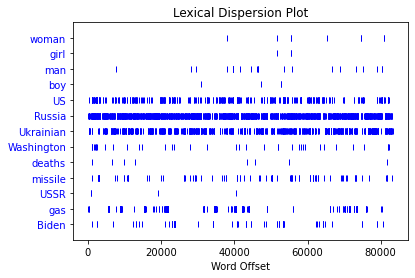

In [15]:
text.dispersion_plot(
    ["woman", "girl", "man", "boy", "US","Russia", "Ukrainian", "Washington", "deaths", "missile", "USSR", "gas", "Biden"]
)

In [16]:
from nltk import FreqDist

In [24]:
freq_dis = FreqDist(text)
freq_dis.most_common(20)

[('said', 1432),
 ('Ukraine', 1380),
 ('Russia', 1290),
 ('Russian', 1215),
 ('Ukrainian', 688),
 ('war', 434),
 ('forces', 405),
 ('would', 344),
 ('US', 330),
 ('city', 296),
 ('Moscow', 291),
 ('people', 285),
 ('military', 282),
 ('country', 271),
 ('Putin', 264),
 ('gas', 249),
 ('also', 241),
 ('Zelenskiy', 237),
 ('invasion', 231),
 ('president', 227)]

In [25]:
meaningful_words = [
    word for word in text if word.casefold() not in stop_words
]

In [26]:
freq_dis = FreqDist(meaningful_words)
freq_dis.most_common(20)

[('said', 1432),
 ('Ukraine', 1380),
 ('Russia', 1290),
 ('Russian', 1215),
 ('Ukrainian', 688),
 ('war', 434),
 ('forces', 405),
 ('would', 344),
 ('US', 330),
 ('city', 296),
 ('Moscow', 291),
 ('people', 285),
 ('military', 282),
 ('country', 271),
 ('Putin', 264),
 ('gas', 249),
 ('also', 241),
 ('Zelenskiy', 237),
 ('invasion', 231),
 ('president', 227)]

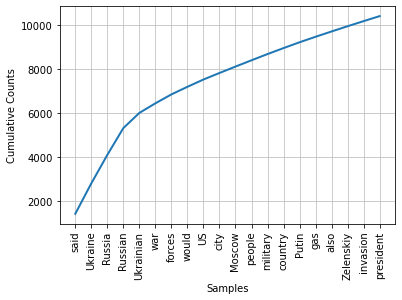

<AxesSubplot:xlabel='Samples', ylabel='Cumulative Counts'>

In [27]:
freq_dis.plot(20, cumulative=True)

In [28]:
colloctin = text.collocations()
colloctin

Volodymyr Zelenskiy; Vladimir Putin; First Edition; every weekday; Jul
2022; Edition free; daily newsletter; Black Sea; Sign First;
newsletter every; prime minister; Russian forces; free daily; weekday
morning; morning 7am; president Volodymyr; armed forces; defence
ministry; invasion Ukraine; Nord Stream


[]